In [9]:
import pandas as pd 
import numpy as np

data = "C:\\Users\\User\\Documents\\Non-University\\Project\\tetes\\convert\\riil.csv"
df = pd.read_csv(data)
df.head(5)

,timestamp,topic,soil2
0,1.750000e+12,sensor/soil,747
1,1.750000e+12,sensor/soil,787
2,1.750000e+12,sensor/soil,784
3,1.750000e+12,sensor/soil,830
4,1.750000e+12,sensor/soil,863


In [13]:
import pandas as pd

# Misalnya df adalah dataframe dari tabel tersebut
df['timestamp'] = range(1, len(df) + 1)

print(df)


     timestamp        topic  soil2            datetime
0            1  sensor/soil    747 2025-06-15 22:06:40
1            2  sensor/soil    787 2025-06-15 22:06:40
2            3  sensor/soil    784 2025-06-15 22:06:40
3            4  sensor/soil    830 2025-06-15 22:06:40
4            5  sensor/soil    863 2025-06-15 22:06:40
..         ...          ...    ...                 ...
328        329  sensor/soil   1263 2025-06-15 22:06:40
329        330  sensor/soil   1216 2025-06-15 22:06:40
330        331  sensor/soil   1194 2025-06-15 22:06:40
331        332  sensor/soil   1226 2025-06-15 22:06:40
332        333  sensor/soil   1199 2025-06-15 22:06:40

[333 rows x 4 columns]


In [14]:
df['soil2'].describe()

count     333.000000
mean     1105.777778
std       169.676176
min         0.000000
25%      1046.000000
50%      1126.000000
75%      1178.000000
max      1984.000000
Name: soil2, dtype: float64

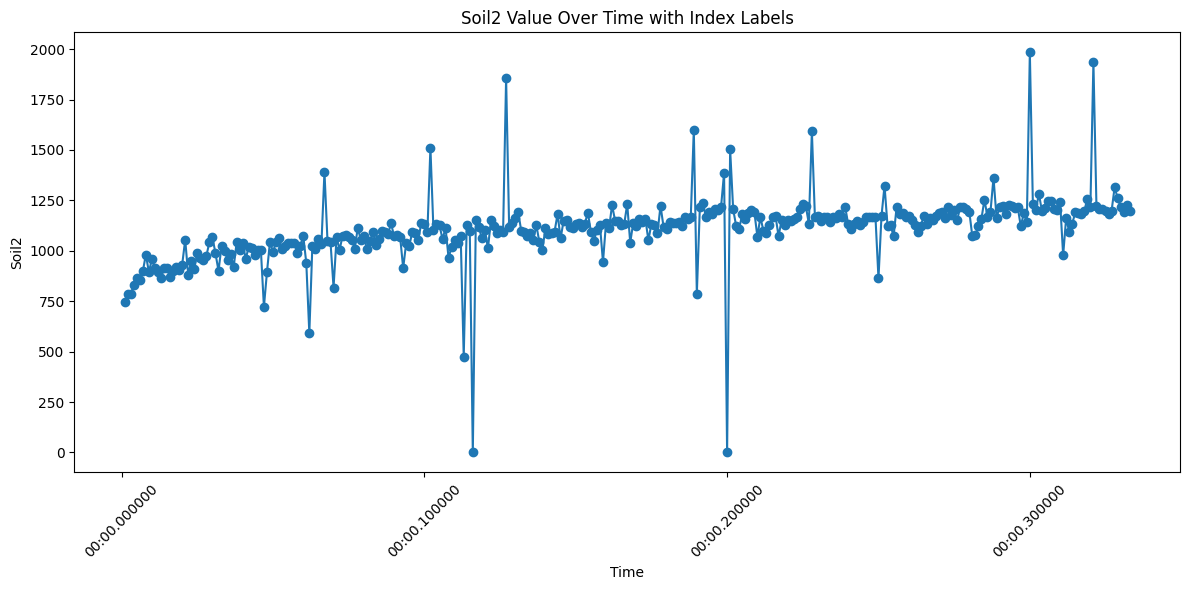

In [15]:
import matplotlib.pyplot as plt 
from datetime import datetime


df['datetime'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x / 1000))

plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['soil2'], marker='o')

plt.xlabel('Time')
plt.ylabel('Soil2')
plt.title('Soil2 Value Over Time with Index Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
mean_diff = df['soil2'].diff().dropna().mean()  # ganti dengan nilai sebenarnya
mean_diff

np.float64(1.3614457831325302)

In [43]:
# Daftar index yang mau diganti
indexes = [46, 47, 61, 66, 69, 92, 101, 112, 115, 126, 158, 188, 189, 199, 200, 227, 249, 251, 287, 299, 310, 320]
df_clean = df.copy()
# Terapkan perubahan ke df['soil2']
df_clean.loc[indexes, 'soil2'] = [i - 1 + mean_diff for i in indexes]


C:\Users\User\AppData\Local\Temp\ipykernel_21888\743907514.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[np.float64(46.36144578313253), np.float64(47.36144578313253), np.float64(61.36144578313253), np.float64(66.36144578313252), np.float64(69.36144578313252), np.float64(92.36144578313252), np.float64(101.36144578313252), np.float64(112.36144578313252), np.float64(115.36144578313252), np.float64(126.36144578313252), np.float64(158.36144578313252), np.float64(188.36144578313252), np.float64(189.36144578313252), np.float64(199.36144578313252), np.float64(200.36144578313252), np.float64(227.36144578313252), np.float64(249.36144578313252), np.float64(251.36144578313252), np.float64(287.3614457831325), np.float64(299.3614457831325), np.float64(310.3614457831325), np.float64(320.3614457831325)]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[indexes,

In [46]:
mean_diff_clean = df_clean['soil2'].diff().dropna().mean()  # ganti dengan nilai sebenarnya
mean_diff_clean

np.float64(1.3614457831325295)

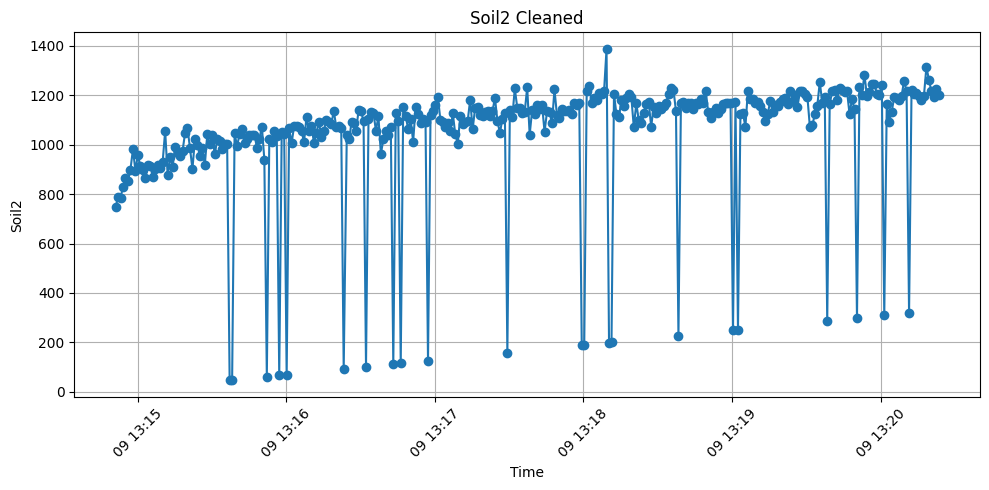

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(df_clean['datetime'], df_clean['soil2'], marker='o', linestyle='-')
plt.title('Soil2 Cleaned')
plt.xlabel('Time')
plt.ylabel('Soil2')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


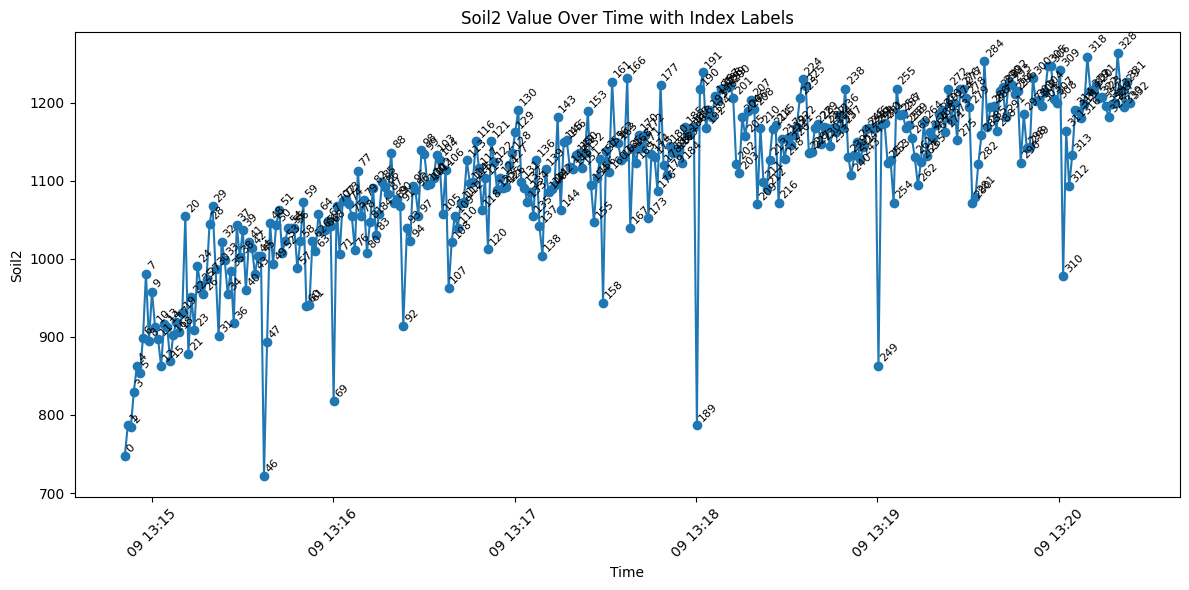

In [34]:

plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['soil2'], marker='o')

# Tambahkan label index di setiap titik
for i, (x, y) in enumerate(zip(df['datetime'], df['soil2'])):
    plt.text(x, y + 5, str(i), fontsize=8, rotation=45)  # `+5` biar teks tidak nabrak titik

plt.xlabel('Time')
plt.ylabel('Soil2')
plt.title('Soil2 Value Over Time with Index Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
